We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [44]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-17 17:07:36--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.117, 13.227.223.89, 13.227.223.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.117|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [45]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [46]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [47]:
#df['pcases']  = np.nan
#df['pdeaths'] = np.nan

Last check of our source dataframe.

In [48]:
df.count()

dateRep                    17576
day                        17576
month                      17576
year                       17576
cases                      17576
deaths                     17576
countriesAndTerritories    17576
geoId                      17576
countryterritoryCode       17412
popData2018                17355
continentExp               17576
dtype: int64

We pivot to a country by column format.

In [49]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          ...  \
geoId         AD     AE      AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                   ...   
2019-12-31   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...     ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-13   2.0  783.0   280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0   259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   
2020-05-15   1.0  698.0   113.0  0.0  0.0  18.0  142.0  3.0  255.0  41.0  ...   
2020-05-16   0.0  747.0  1063.0  0.0  0.0  18.0  184.0  0.0  345.0  63.0  ...   
2020-05-17   0.0  796.0     0.0  0.0  0.0  17.0  239.0  0.0  326.0  72.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-13    0.0  0.0  0.0  0.0  0.0  1.0  2.0   0.0  0.0  0.0  
2020-05-14    0.0  0.0  0.0  1.0  0.0  0.0  1.0  13.0  0.0  0.0  
2020-05-15    0.0  0.0  0.0  0.0  0.0  0.0  1.0  19.0  0.0  0.0  
2020-05-16    0.0  0.0  0.0  0.0  0.0  0.0  2.0   9.0  0.0  0.0  
2020-05-17    0.0  0.0  0.0  0.0  0.0  0.0  4.0  14.0  0.0  0.0  

[139 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [50]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('243 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-01-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-14   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-01-15   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-01-11 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-12 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-13 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-14 NaN  NaN NaN NaN NaN NaN NaN  
2021-01-15 NaN  NaN NaN NaN NaN NaN NaN  

[382 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [51]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('20191231')).dt.days.astype('int')
df_geo['daynum'].describe()

count    382.000000
mean     190.500000
std      110.418145
min        0.000000
25%       95.250000
50%      190.500000
75%      285.750000
max      381.000000
Name: daynum, dtype: float64

In [52]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

JP Res 0.078 at 100% of   16089 peak 2020-04-18 floor 2020-05-05 b 11.197 m 108.021
RU Res 0.020 at  33% of  730633 peak 2020-05-20 floor 2020-09-13 b 25.102 m 140.823
US Res 0.258 at  84% of 1647465 peak 2020-04-19 floor 2020-07-14 b 17.103 m 109.348
BR Res 0.053 at  13% of 1366526 peak 2020-06-15 floor 2020-12-13 b 41.213 m 166.700
AT Res 2.340 at  99% of   16047 peak 2020-03-29 floor 2020-05-17 b 10.828 m  88.880
CH Res 0.157 at  98% of   30693 peak 2020-03-30 floor 2020-05-26 b 11.028 m  89.835
DE Res 0.216 at  96% of  177682 peak 2020-04-04 floor 2020-06-01 b 13.141 m  94.769
IT Res 0.076 at  93% of  236424 peak 2020-04-02 floor 2020-06-21 b 16.682 m  92.222
ES Res 0.343 at  97% of  234624 peak 2020-04-02 floor 2020-06-08 b 12.735 m  92.130
PT Res 0.289 at  94% of   29816 peak 2020-04-10 floor 2020-06-14 b 13.870 m 100.678
FR Res 0.212 at  95% of  147825 peak 2020-04-05 floor 2020-06-06 b 14.172 m  95.941
SE Res 0.114 at  66% of   42304 peak 2020-04-25 floor 2020-08-18 b 26.182 m 

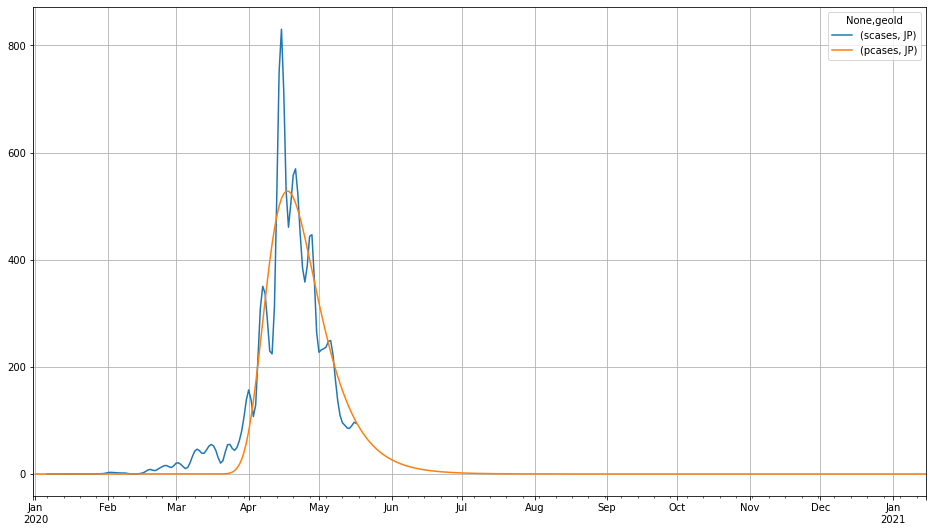

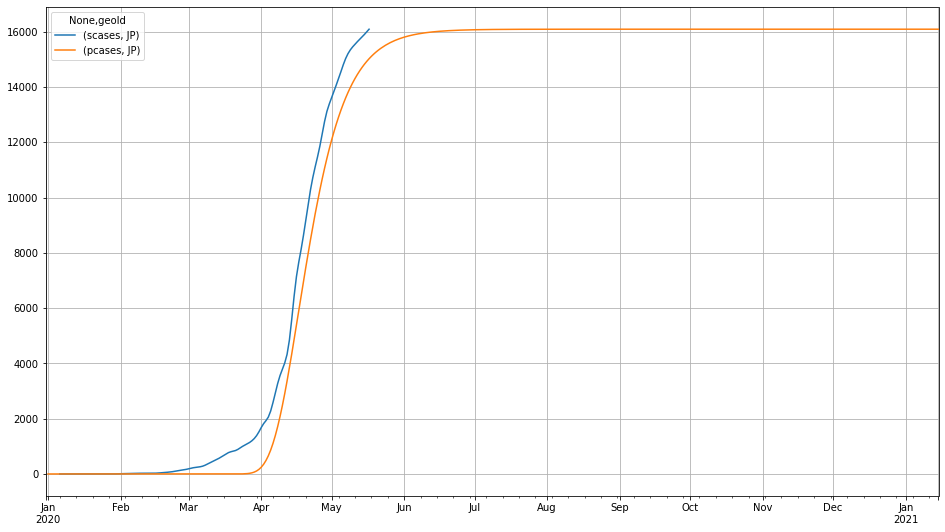

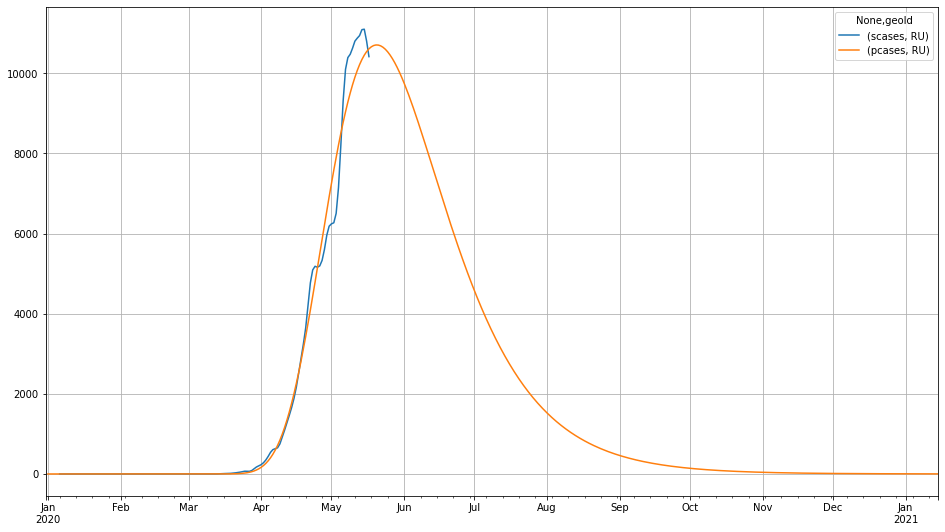

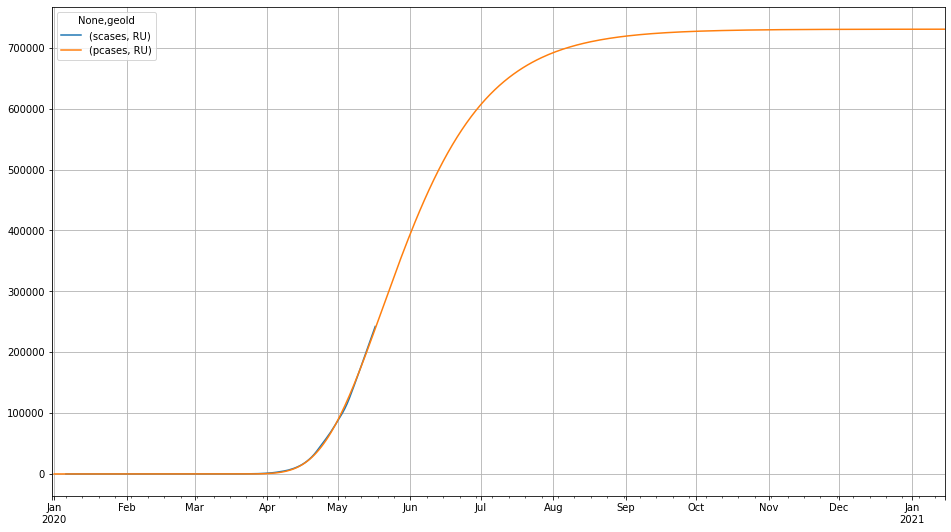

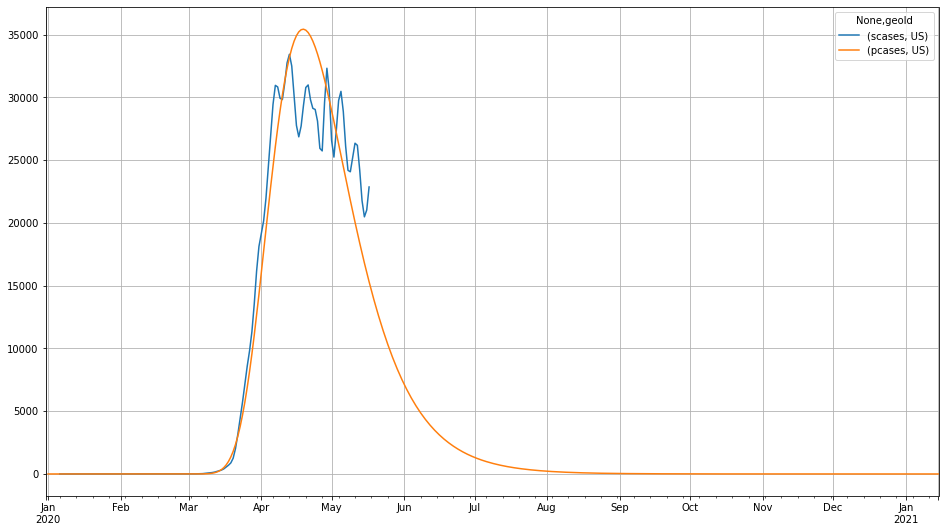

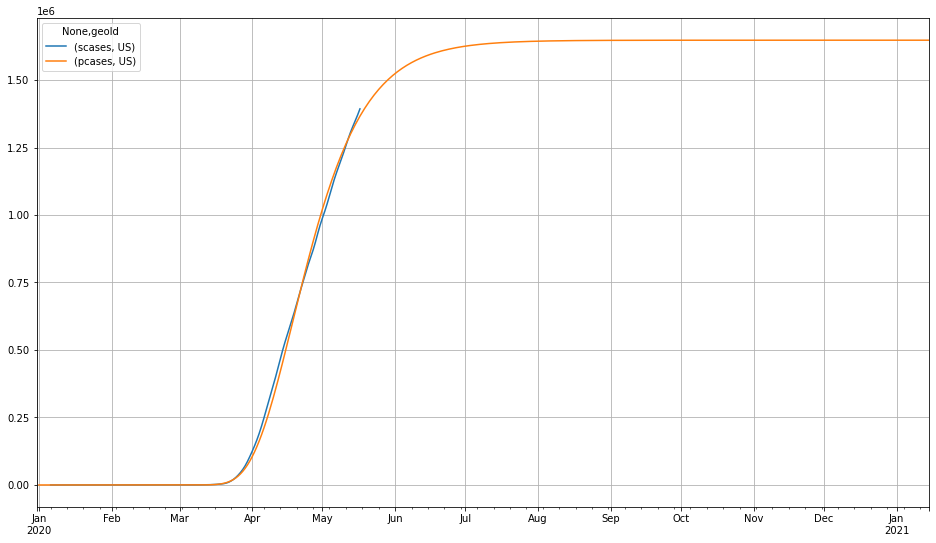

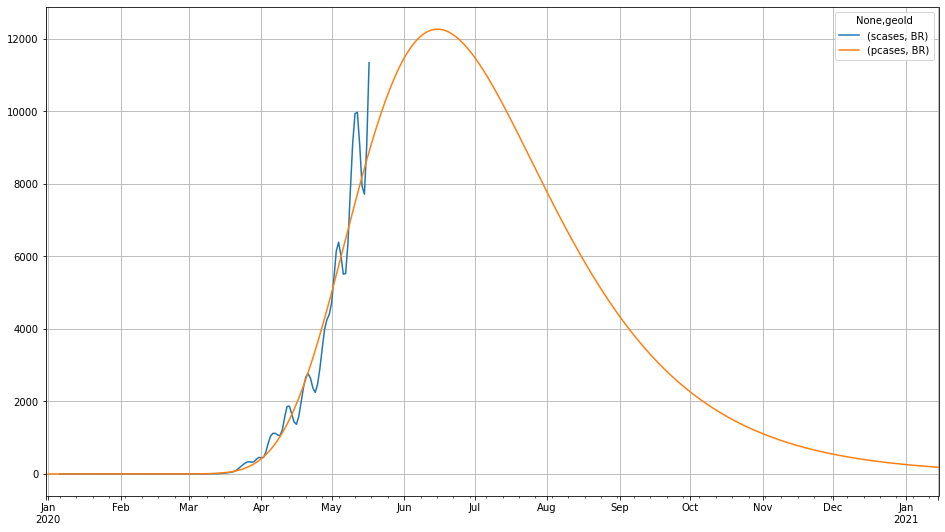

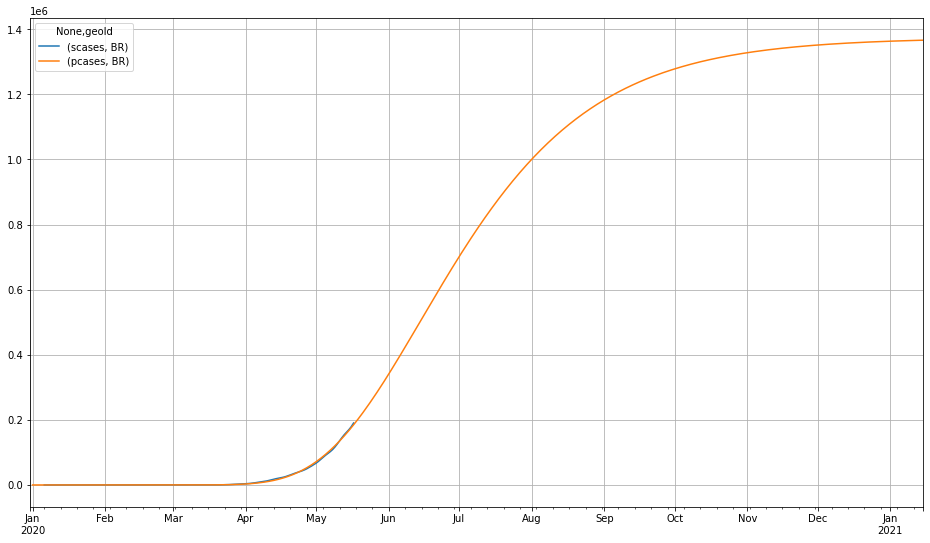

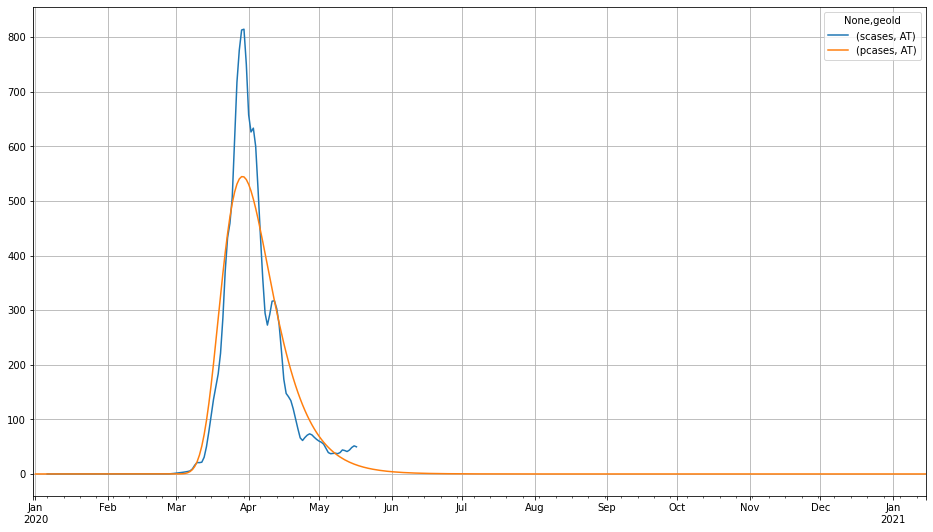

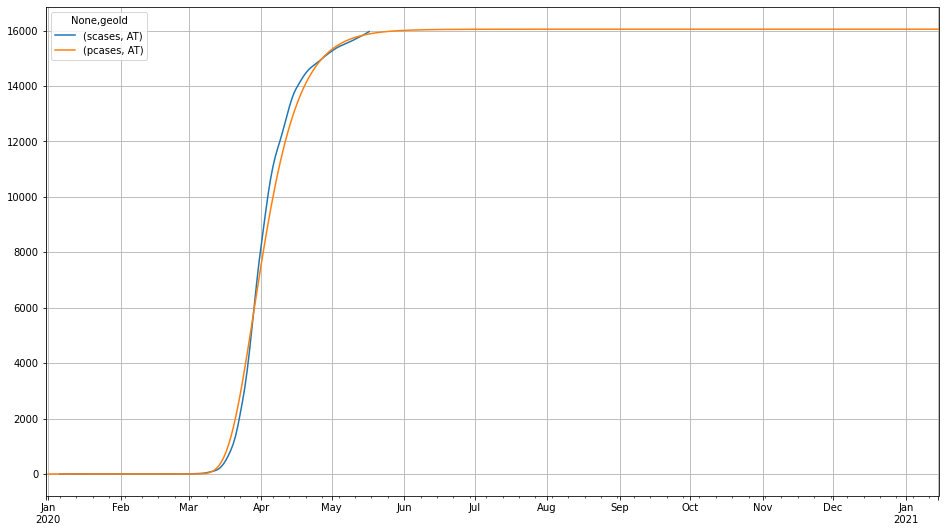

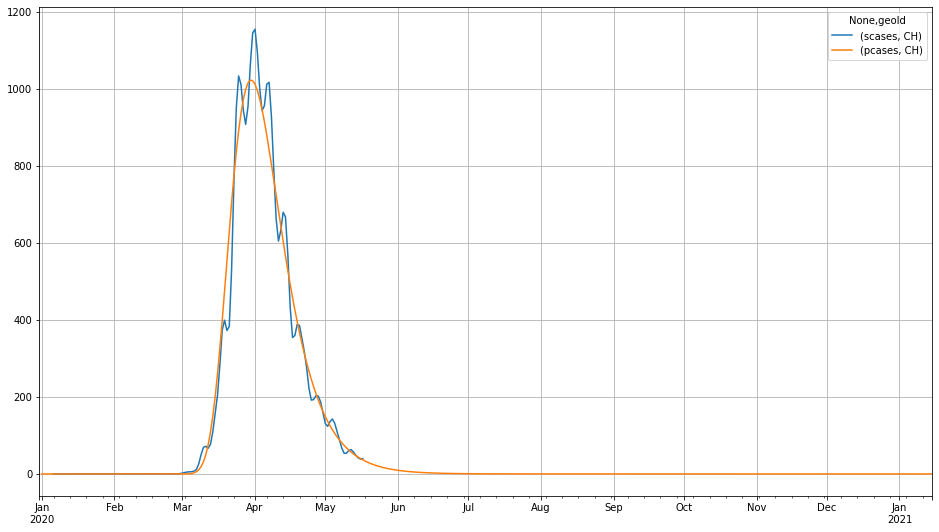

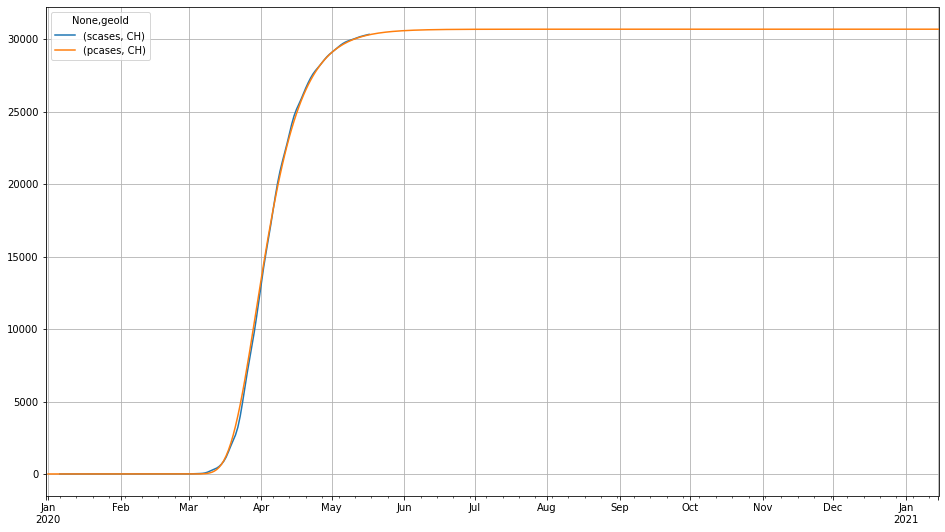

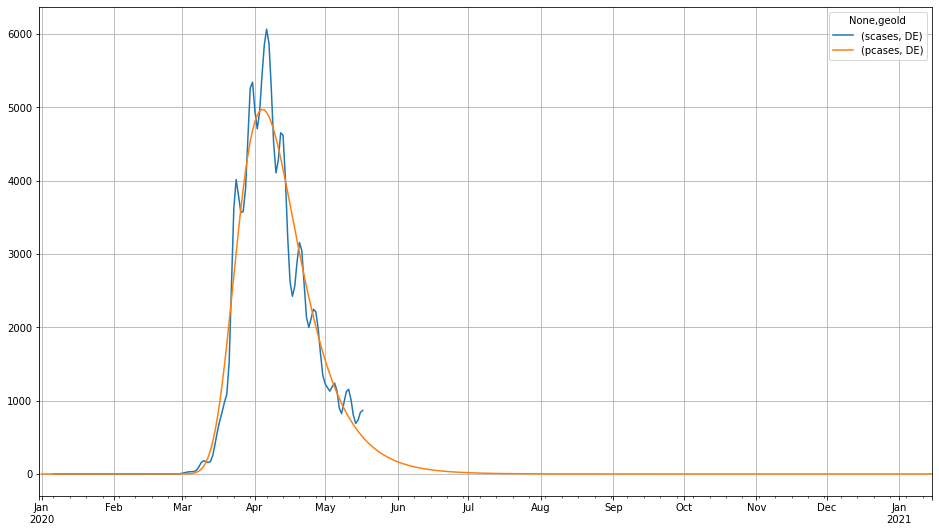

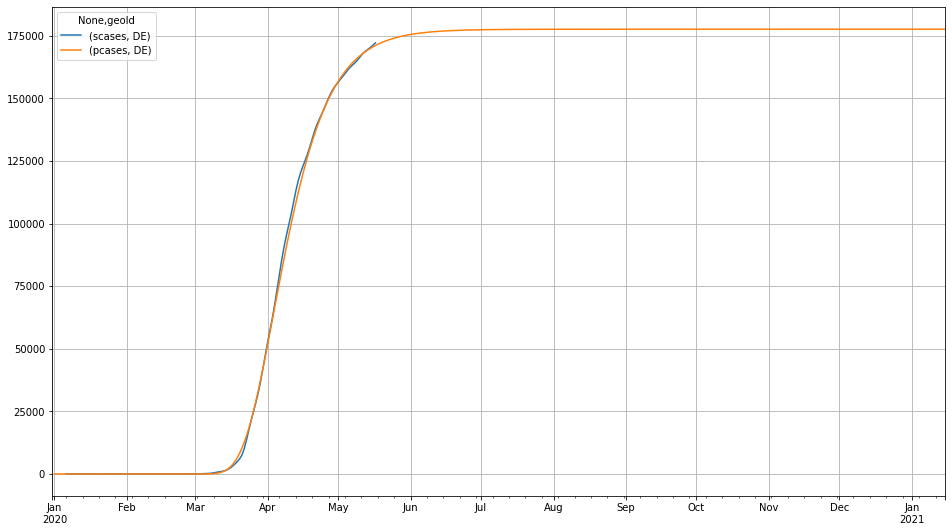

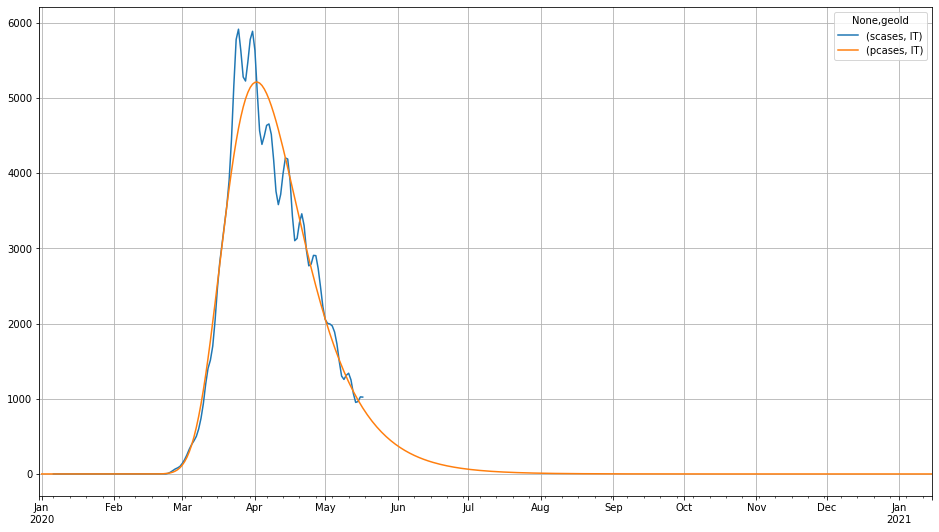

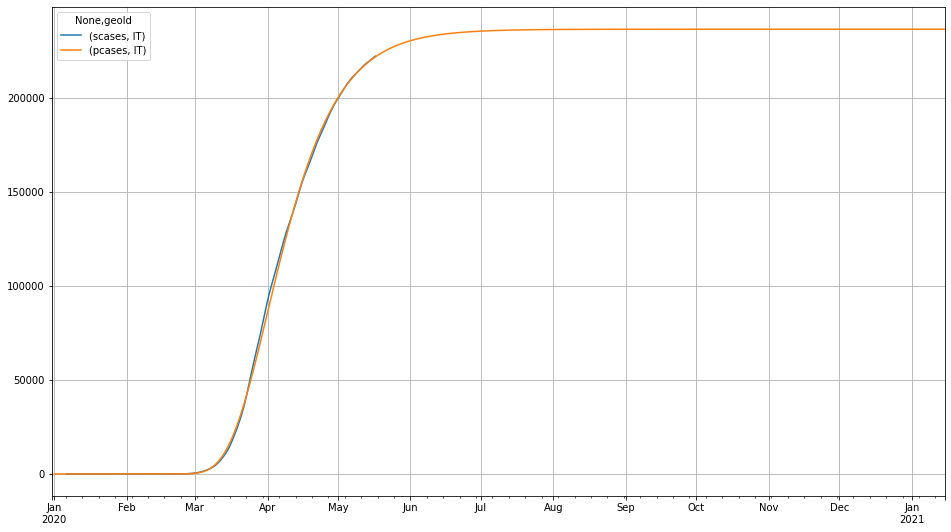

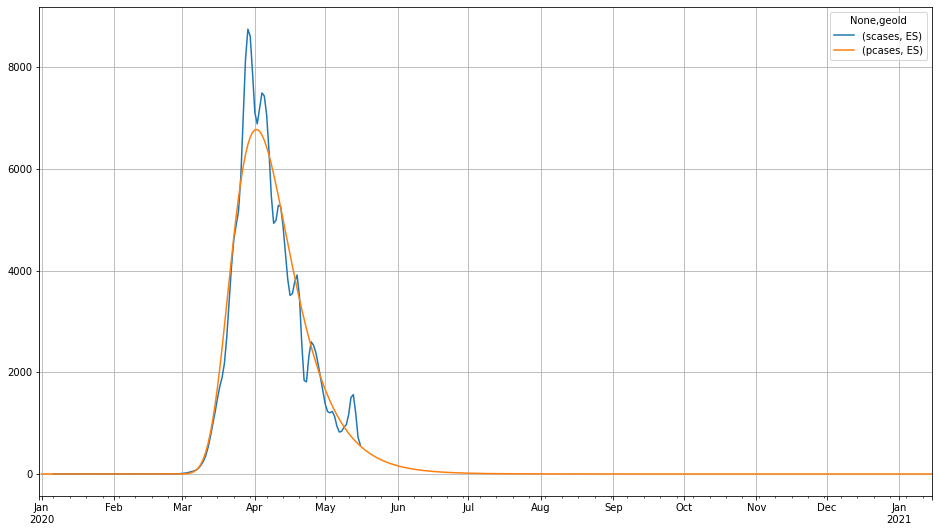

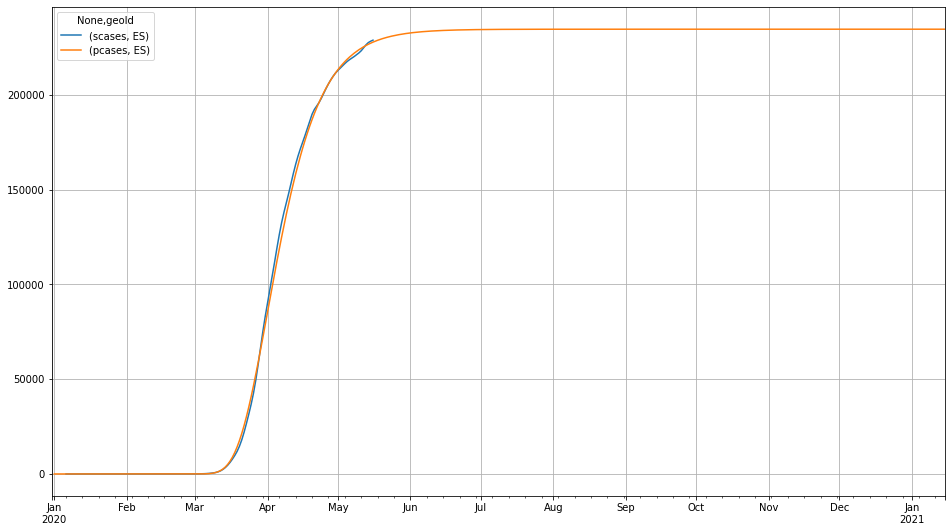

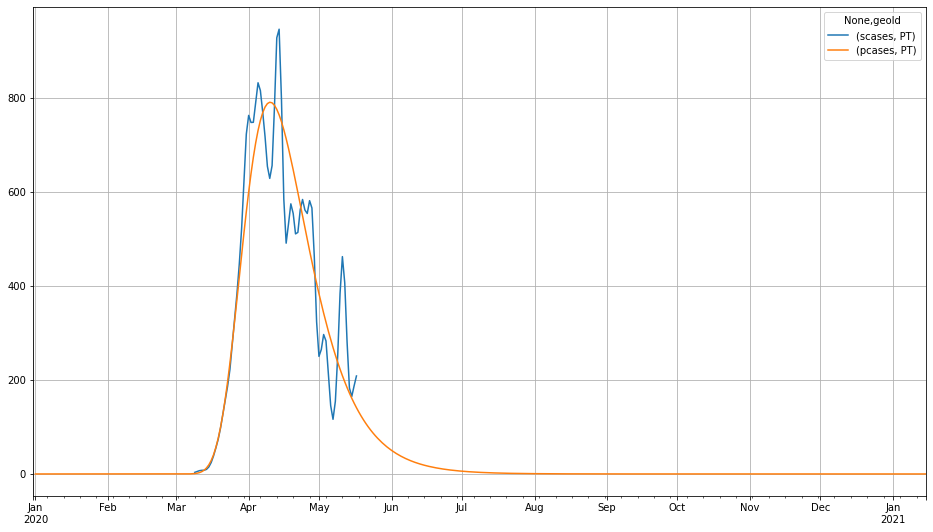

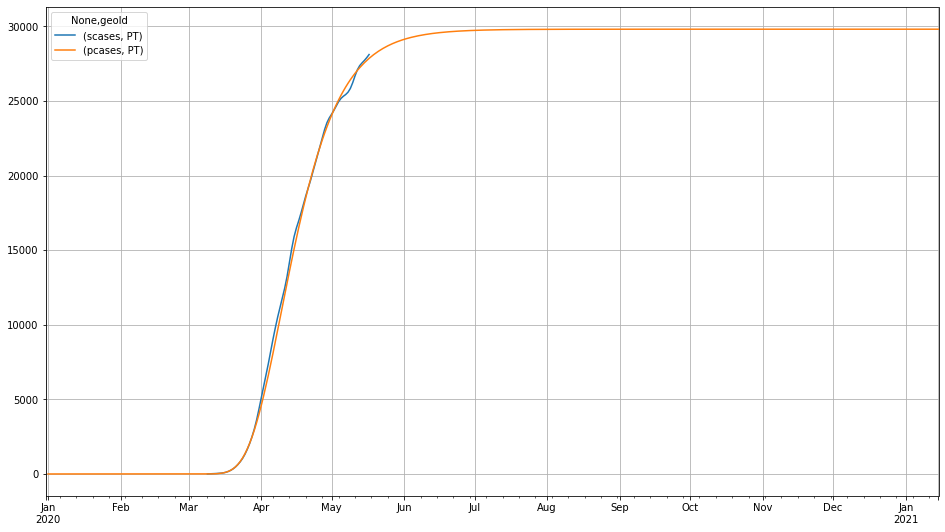

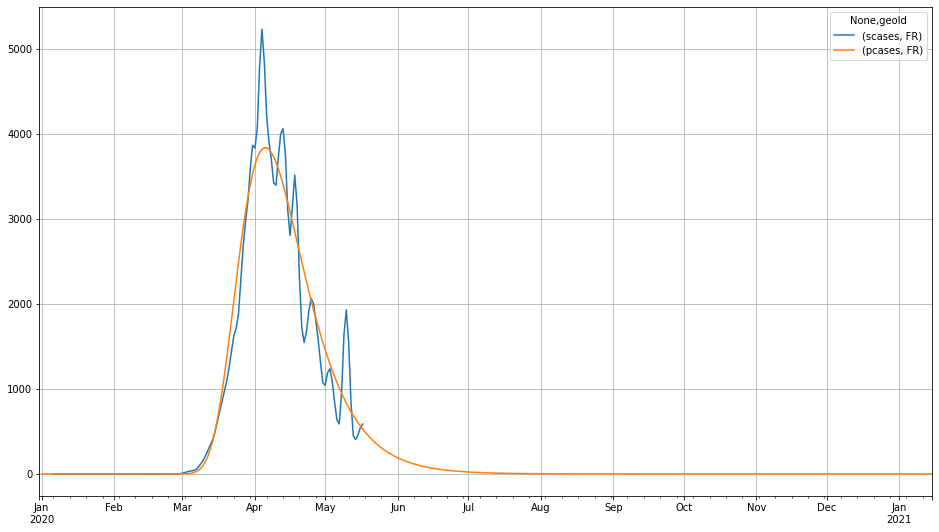

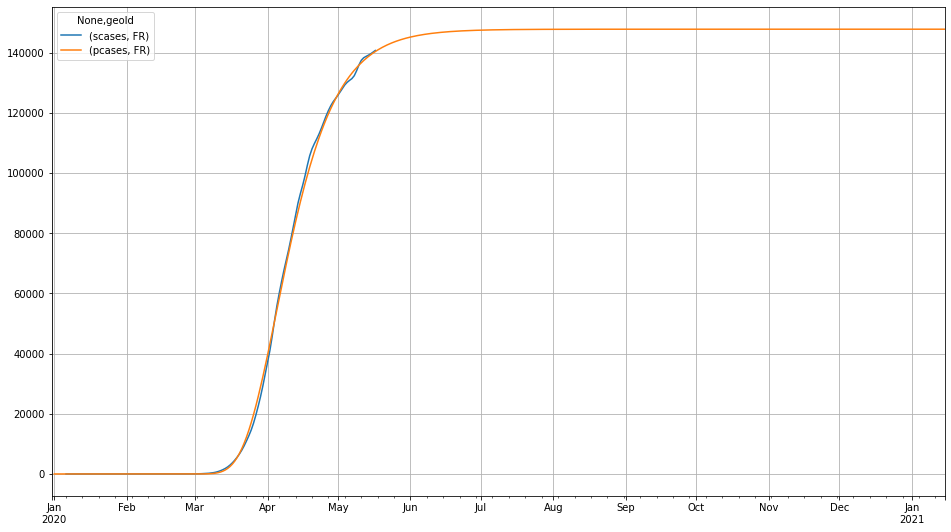

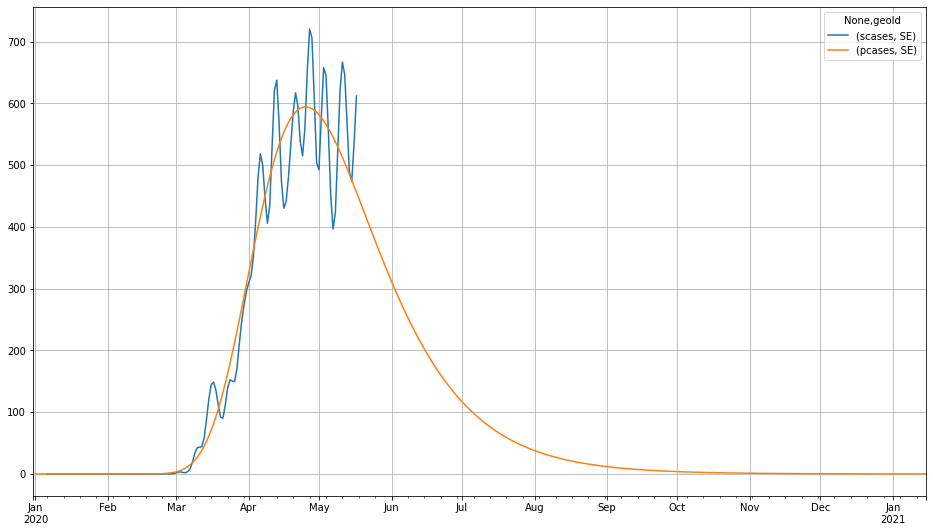

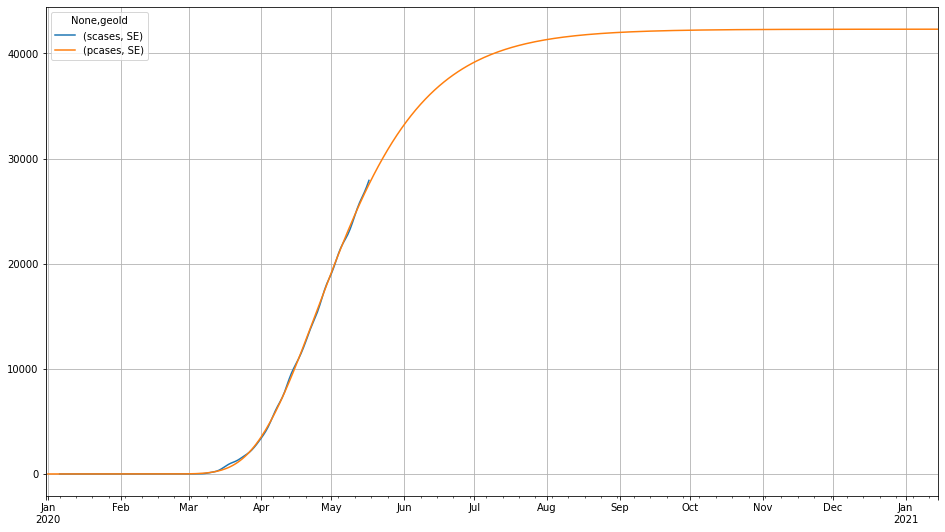

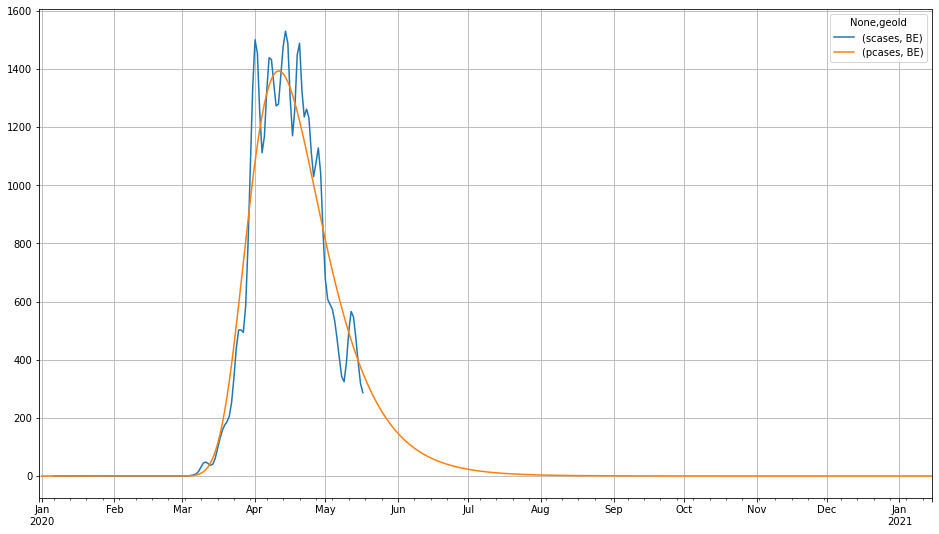

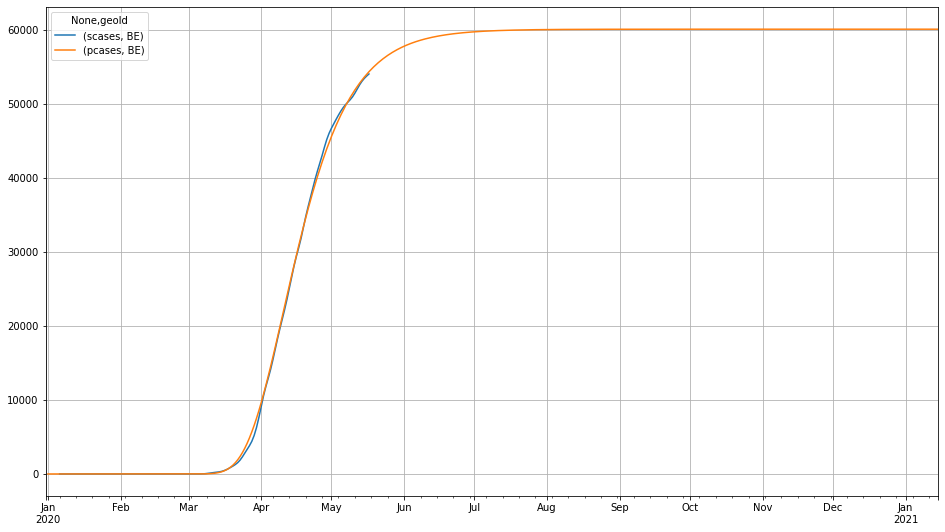

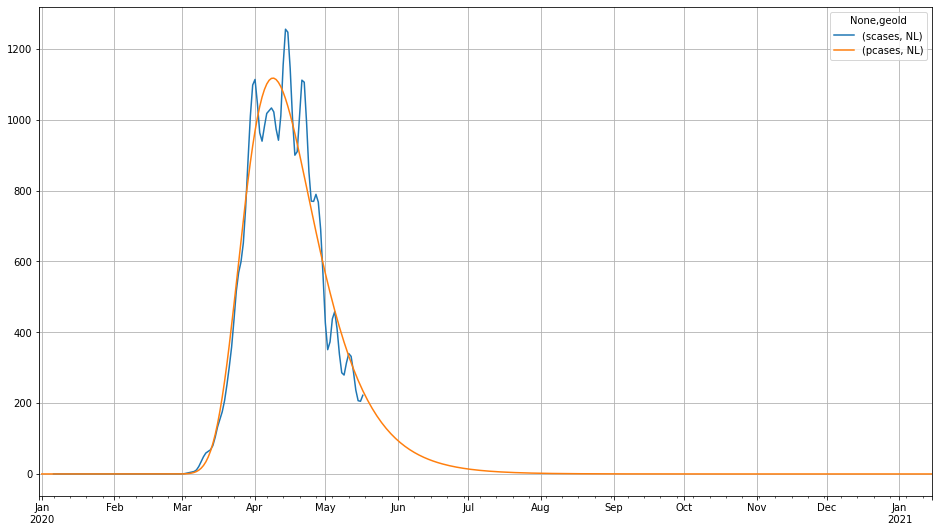

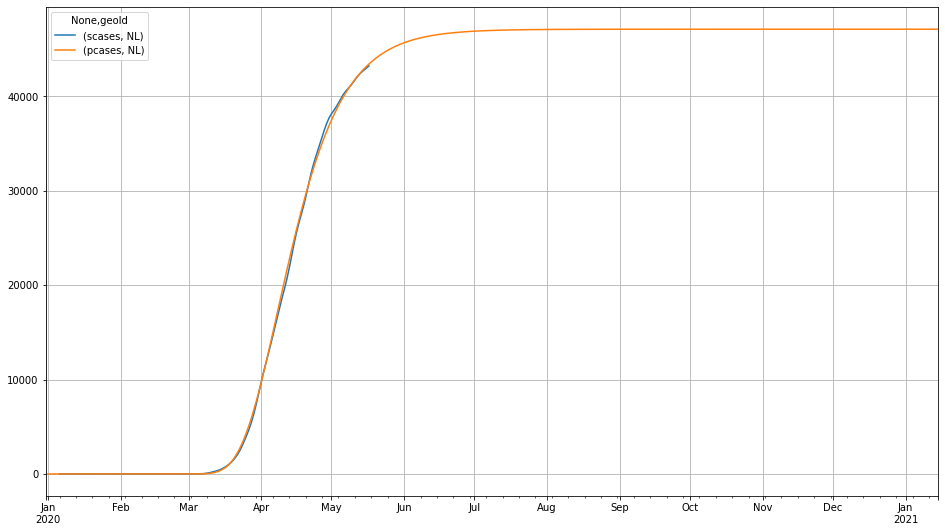

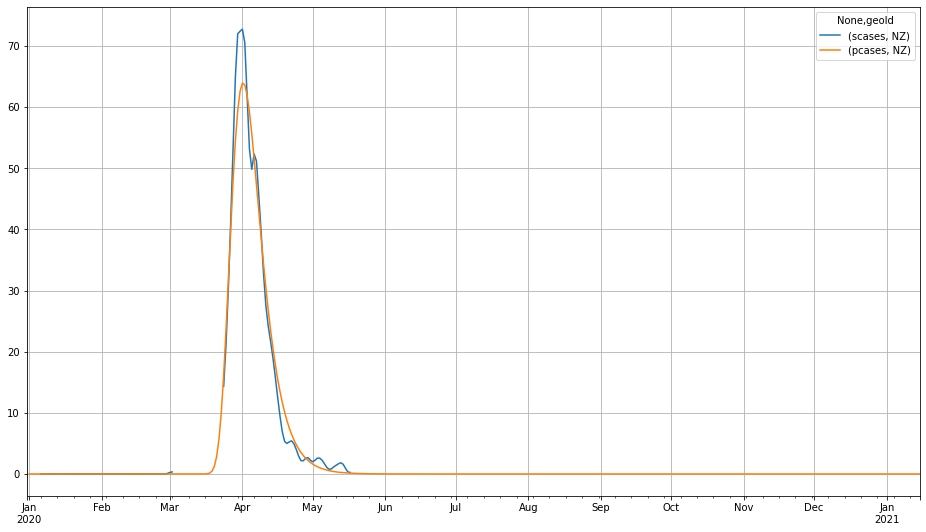

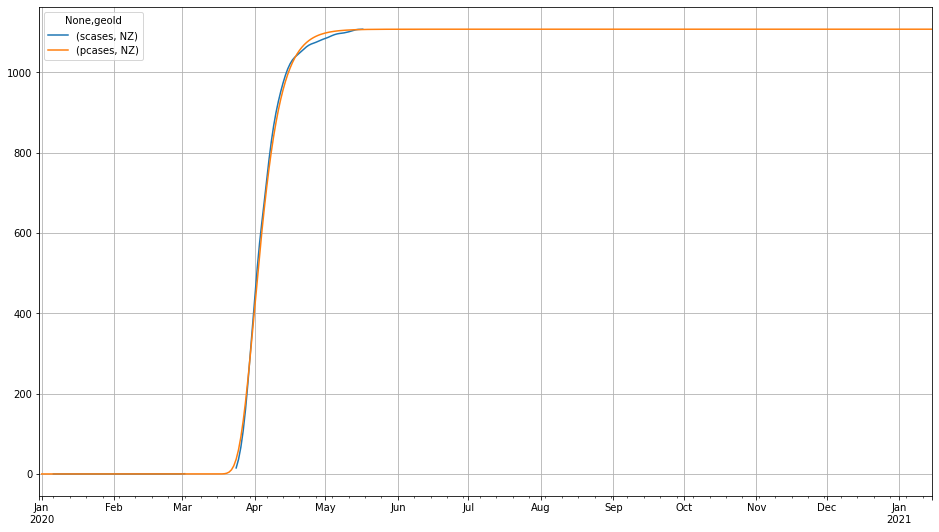

In [53]:
# countries = np.sort(df['geoId'].unique())
countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

def calcresd(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        return(fit[1][0])
    else:
        return 99    

from scipy.optimize import minimize

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7, win_type='hann').mean()
    df_pred = pd.DataFrame({'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    mincases = df[df['geoId'] == country]['popData2018'].iloc[0] / 1e6
    maxcases = df_pred[measure].cumsum().max()
    df_pred = df_pred[df_pred[measure] > mincases]
    
    if len(df_pred) > 0:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        optim = minimize(calcresd, 1, method='SLSQP', bounds=[(0.1, 1)])
        progress = optim.x[0]
        
        df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * maxcases / progress
        df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
        
        slope = fit[0][0]
        intercept = fit[0][1]
        beta = 1 / slope
        mu = - intercept * beta
        
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))]['daynum'].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (df[df['geoId'] == country]['popData2018'].iloc[0] / 5e5)) & (df_geo[(pmeasure, country)].index > peak)]['daynum'].index.min()
        
        print(country, "Res %5.3f at %3d%% of %7d" %(optim.fun, progress * 100, df_geo[pmeasure][country].cumsum().max()), "peak", peak.date(), "floor", floor.date(), "b %6.3f m %7.3f" %(beta, mu))
        
        df_geo[[(smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.